In [ ]:
import pandas as pd
import numpy as np
from benchmarks import MinVarianceMethod
from environment import Environment
from utils import get_stats

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Loading Environments

In [2]:
env = Environment()
minvar_method = MinVarianceMethod(allow_short=True)

/Users/njh/Documents/qf634-quant-research-methods/environment.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.dropna(axis=0, inplace=True)
/Users/njh/Documents/qf634-quant-research-methods/environment.py:32: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return_df = df.drop(columns=['Date']).pct_change()


# Testing and getting results

In [4]:
WINDOW_FIT = 180
WINDOW_HOLD = 180
N_ASSETS = len(env.returns.columns)
actions_equal, actions_minvar = [], []
result_equal, result_minvar = [], []


for i in range(WINDOW_FIT, len(env.returns), WINDOW_HOLD):
    if (i + WINDOW_FIT > len(env.returns)) :
        print("Exceeded training and hold window, will stop")
        break

    state = env.get_state(
        start=i, 
        length=WINDOW_FIT
        )
    
    equal_weights = np.ones(N_ASSETS) / N_ASSETS
    min_var_weights = minvar_method.get_optimal_weights(state)
 
    holding_period_returns = env.get_state(
        start = i + WINDOW_FIT, 
        length = WINDOW_HOLD
    )
    
    r = np.dot(holding_period_returns, equal_weights)
    result_equal.append(r.tolist())
    actions_equal.append(equal_weights)
    
    r = np.dot(holding_period_returns, min_var_weights)
    result_minvar.append(r.tolist())
    actions_minvar.append(min_var_weights)



Getting df from start: 180 to end 359
Getting df from start: 360 to end 539
Getting df from start: 360 to end 539
Getting df from start: 540 to end 583
Exceeded training and hold window, will stop


# Evaluation

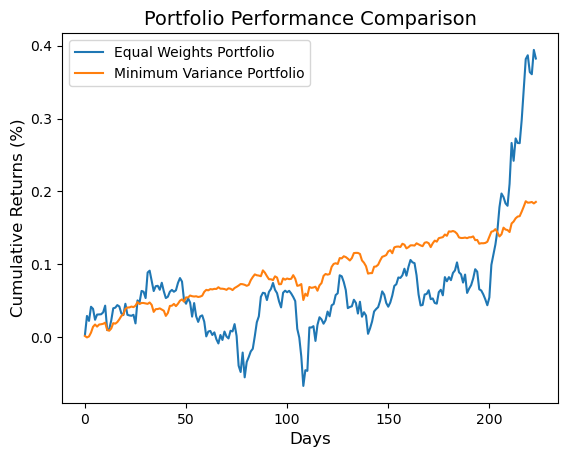

In [ ]:
# flatten into list and compare results
equal_weights_daily_returns = [item for sublist in result_equal for item in sublist]
minvar_method_daily_returns = [item for sublist in result_minvar for item in sublist]


plt.figure()
plt.xlabel("Days", fontsize=12)
plt.ylabel("Returns (%)")
plt.plot(np.array(equal_weights_daily_returns).cumsum(), label = "Equal Weights Portfolio")
plt.plot(np.array(minvar_method_daily_returns).cumsum(), label = "Minimum Variance Portfolio")
plt.ylabel("Cumulative Returns (%)", fontsize=12)
plt.title("Portfolio Performance Comparison", fontsize=14)
plt.legend(fontsize=10)  # Add legend for clarity
plt.show()


In [ ]:
stats = pd.DataFrame()


equal_weights_stats = 

